# Predictive Maintenance of Machinery: Enhancing Efficiency and Cost Savings

In today's rapidly evolving industrial landscape, predictive maintenance (PdM) of machinery stands at the forefront of technological innovation, offering companies a proactive approach to asset management and substantial cost savings. This transformative concept leverages advanced data analytics and machine learning to revolutionize how companies manage their critical assets, ensuring uninterrupted operations while significantly reducing maintenance costs.

**Why Predictive Maintenance Matters:**

At its core, predictive maintenance is a forward-looking strategy aimed at predicting and preventing equipment failures before they occur. Rather than relying on reactive maintenance practices that address problems only after they disrupt operations, predictive maintenance enables companies to anticipate issues, plan maintenance activities, and optimize resource allocation.

**How Predictive Maintenance Benefits Companies:**

1. **Minimizing Downtime**: Predictive maintenance allows for the identification of potential issues well in advance. This ensures that maintenance can be scheduled during planned downtime, reducing unplanned interruptions and maintaining consistent production schedules.

2. **Optimizing Maintenance Schedules**: By analyzing real-time data, predictive maintenance fine-tunes maintenance schedules. This eliminates unnecessary inspections and component replacements, resulting in cost savings and more efficient resource utilization.

3. **Extending Equipment Lifespan**: Addressing problems early on delays the need for costly equipment replacements, contributing to significant capital expenditure reductions.

4. **Enhancing Safety**: Regularly scheduled maintenance prevents potential safety hazards, providing a safer working environment for employees.

**Realizing Cost Savings:**

The potential for cost savings through predictive maintenance is substantial. By preventing expensive breakdowns, optimizing maintenance, and improving machinery performance, companies can anticipate several financial benefits, including:

- **Reduced Repair Costs**: Significant decreases in emergency repairs and associated expenses.
- **Lower Replacement Costs**: Extended equipment lifespans defer the need for costly replacements.
- **Enhanced Operational Efficiency**: Increased uptime and better machinery performance lead to higher productivity.
- **Inventory Reduction**: Precision maintenance scheduling reduces the need for extensive spare parts inventory.
- **Energy Efficiency**: Enhanced machinery performance results in lower energy consumption.

The exact cost savings will vary depending on the scope and complexity of operations. Nonetheless, predictive maintenance is a strategic investment that positions companies at the forefront of industry best practices, enabling them to harness cutting-edge technology for operational optimization, improved competitiveness, and sustainable growth. By embracing predictive maintenance, companies can enhance efficiency, reduce costs, and secure a more resilient and profitable future.

**importing the needed libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import numpy as np
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")


**loading the dataset**

In [2]:
df=pd.read_csv(r"C:\Users\OWNER\Desktop\VICTOR\machine failure.csv")
df.sample(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
5612,5613,L52792,L,303.0,312.3,1486,42.4,112,0,0,0,0,0,0
9249,9250,L56429,L,298.3,309.0,1657,32.2,179,0,0,0,0,0,0
8854,8855,M23714,M,297.7,309.0,1433,41.8,16,0,0,0,0,0,0
9120,9121,L56300,L,297.4,308.4,1525,38.7,62,0,0,0,0,0,0
8504,8505,L55684,L,298.4,309.7,1419,41.3,159,0,0,0,0,0,0


**Exploratory Data  Analysis**

In [80]:
df.isnull().sum().sum()

0

There are no null values in the dataset

In [81]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [82]:
df["Type"].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [83]:
df[df["Machine failure"]==1]
#checking for row in which machine failure is 1

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9758,9759,L56938,L,298.6,309.8,2271,16.2,218,1,1,0,0,0,0
9764,9765,L56944,L,298.5,309.5,1294,66.7,12,1,0,0,1,0,0
9822,9823,L57002,L,298.5,309.4,1360,60.9,187,1,0,0,0,1,0
9830,9831,L57010,L,298.3,309.3,1337,56.1,206,1,0,0,0,1,0


In [84]:
df[df["Machine failure"]==0]
#checking the row where machine failure is 0

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


**A Brief Data Vsualization**

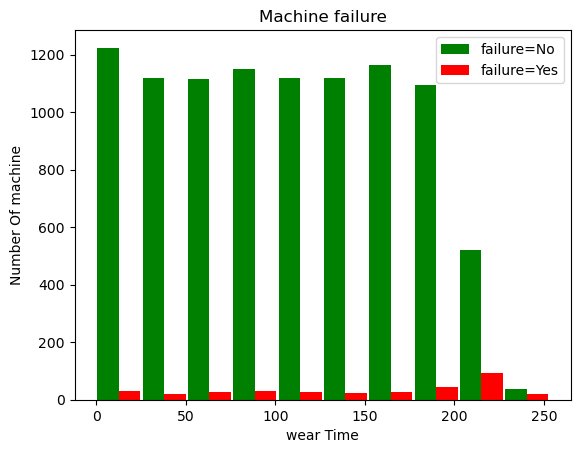

In [85]:
machine_wear_time_failure_no=df[df["Machine failure"]==0]["Tool wear [min]"]
machine_wear_time_failure_yes=df[df["Machine failure"]==1]["Tool wear [min]"]

plt.xlabel("wear Time")
plt.ylabel("Number Of machine")
plt.title("Machine failure")


plt.hist([machine_wear_time_failure_no, machine_wear_time_failure_yes], rwidth=0.95, color=['green','red'],label=['failure=No','failure=Yes'])
plt.legend()


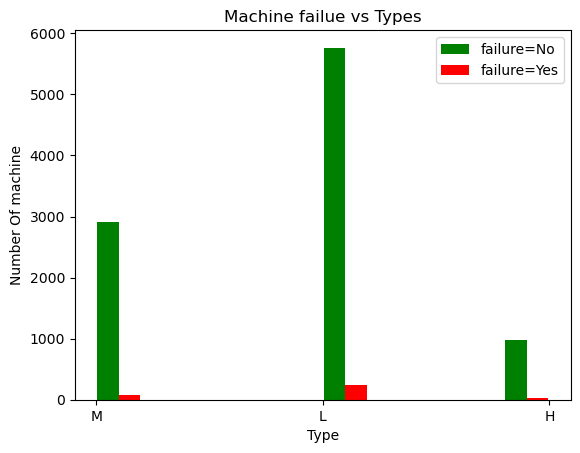

In [86]:
machine_type_failure_no=df[df["Machine failure"]==0]["Type"]
machine_type_failure_yes=df[df["Machine failure"]==1]["Type"]

plt.xlabel("Type")
plt.ylabel("Number Of machine")
plt.title("Machine failue vs Types")


plt.hist([machine_type_failure_no, machine_type_failure_yes], rwidth=0.95, color=['green','red'],label=['failure=No','failure=Yes'])
plt.legend()

machine of Type_l has the highest value counts

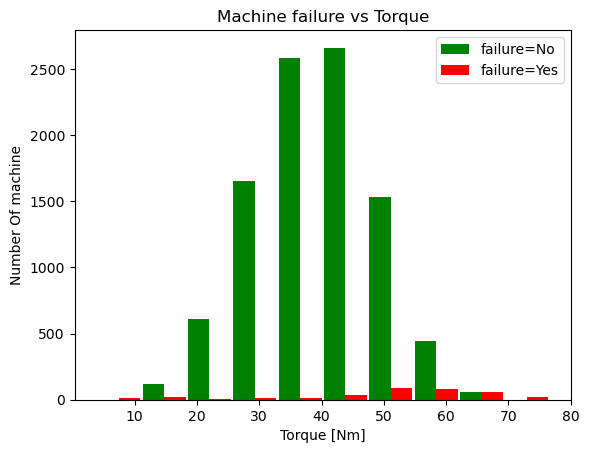

In [87]:
machine_Torque_failure_no=df[df["Machine failure"]==0]["Torque [Nm]"]
machine_Torque_failure_yes=df[df["Machine failure"]==1]["Torque [Nm]"]

plt.xlabel("Torque [Nm]")
plt.ylabel("Number Of machine")
plt.title("Machine failure vs Torque")

plt.hist([machine_Torque_failure_no, machine_Torque_failure_yes], rwidth=0.95, color=['green','red'],label=['failure=No','failure=Yes'])
plt.legend()


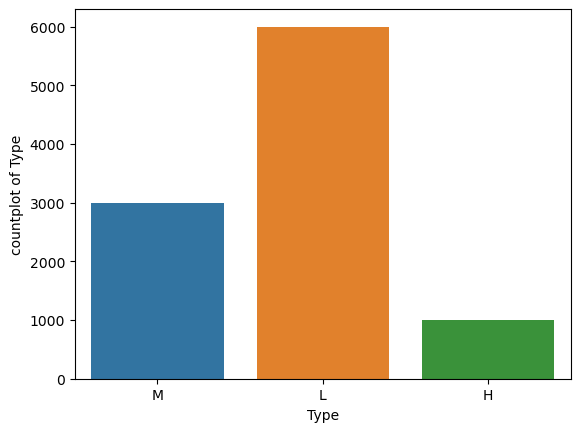

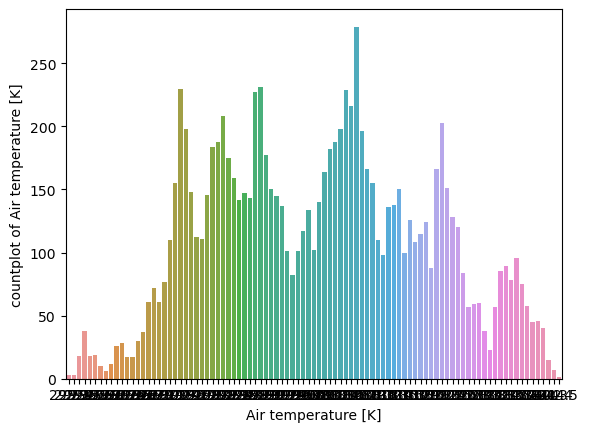

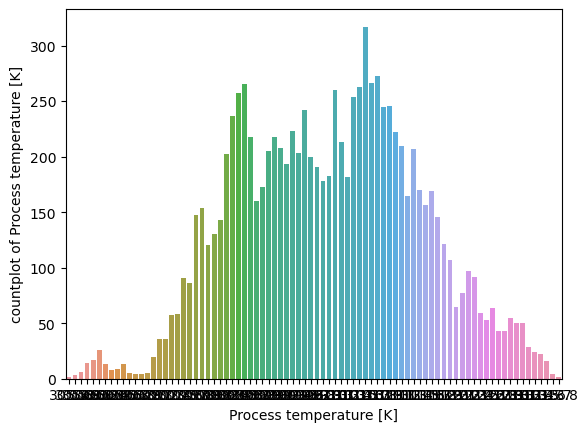

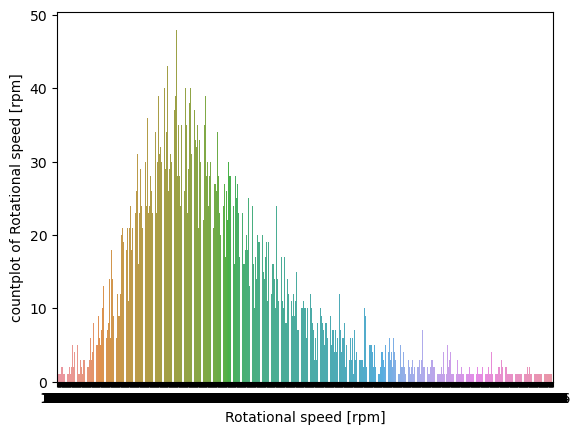

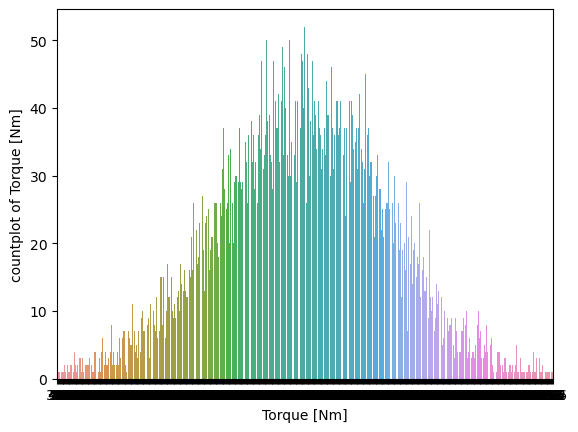

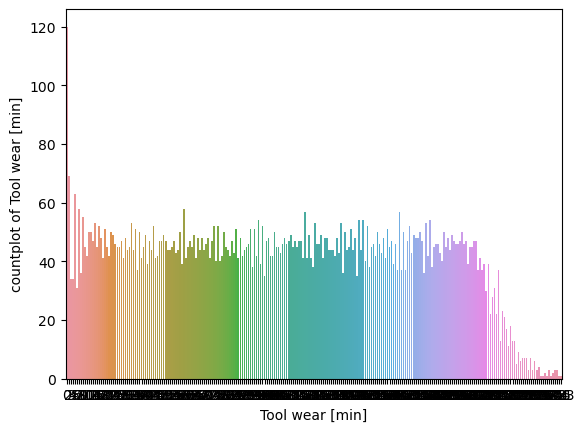

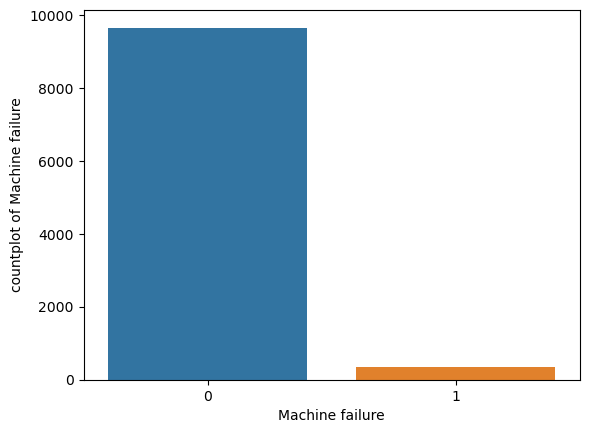

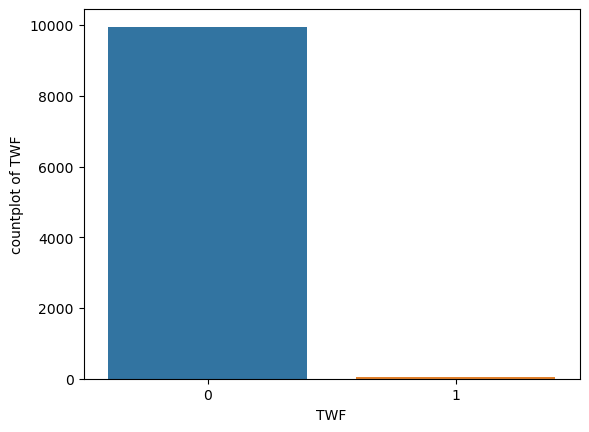

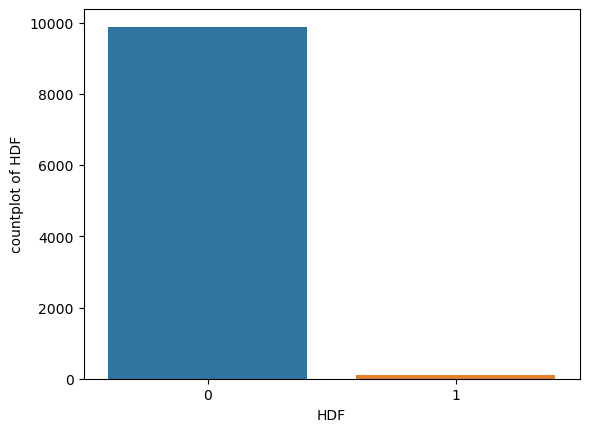

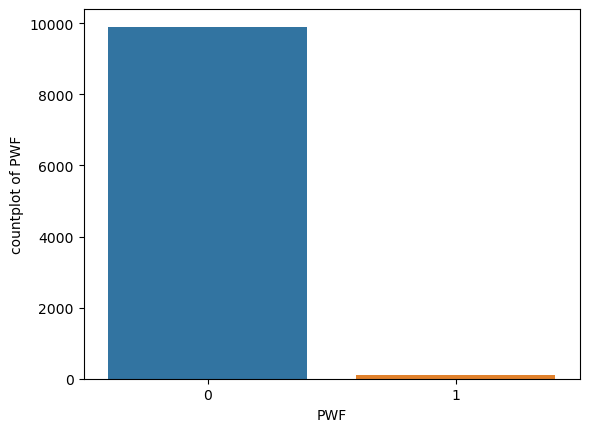

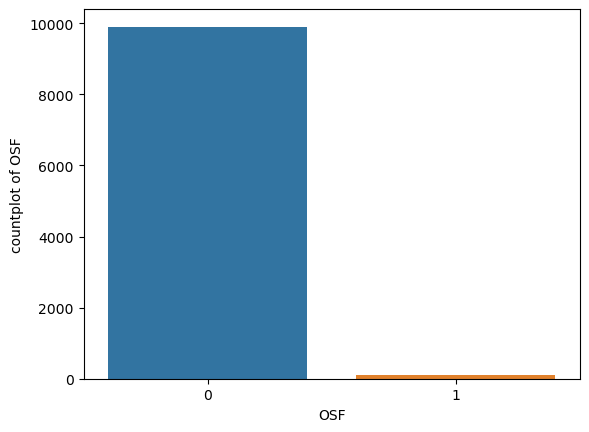

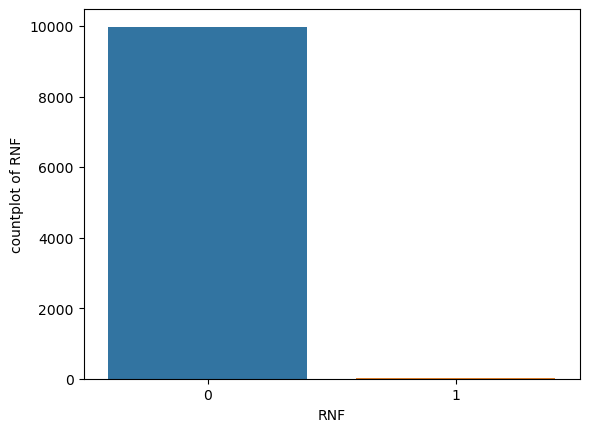

In [88]:
for columns in df.columns[2:]:
    sns.countplot(data=df,x=columns)
    plt.xlabel(columns)
    plt.ylabel(f"countplot of {columns}")
    plt.show()

In [89]:
df["TWF"].value_counts()

0    9954
1      46
Name: TWF, dtype: int64

In [90]:
#printing the value counts  of all the columns in the dataframe 
def print_values_coumts(df):
       for column in df[2:]:
              print(f'{column}: {df[column].value_counts()}') 
                
print_values_coumts(df)   #A function for printing the value counts of columns in the DataFrame
              
           

UDI: 1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: UDI, Length: 10000, dtype: int64
Product ID: M14860    1
L53850    1
L53843    1
L53844    1
L53845    1
         ..
M18193    1
M18194    1
L50515    1
L50516    1
M24859    1
Name: Product ID, Length: 10000, dtype: int64
Type: L    6000
M    2997
H    1003
Name: Type, dtype: int64
Air temperature [K]: 300.7    279
298.9    231
297.4    230
300.5    229
298.8    227
        ... 
304.4      7
296.0      6
295.4      3
295.3      3
304.5      1
Name: Air temperature [K], Length: 93, dtype: int64
Process temperature [K]: 310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: Process temperature [K], Length: 82, dtype: int64
Rotational speed [rpm]: 1452    48
1435    43
1447    42
1429    40
1469    40
        ..
2197     1
2211     1
1905     1
1893     1
2450     1

In [91]:
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [92]:
df.describe(include="all")

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [93]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [5]:
col_to_drop=['UDI', 'Product ID']

In [6]:
df1 = df.drop(columns=col_to_drop)
df1.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


C:\Users\OWNER\AppData\Local\Temp\ipykernel_11084\3749009195.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


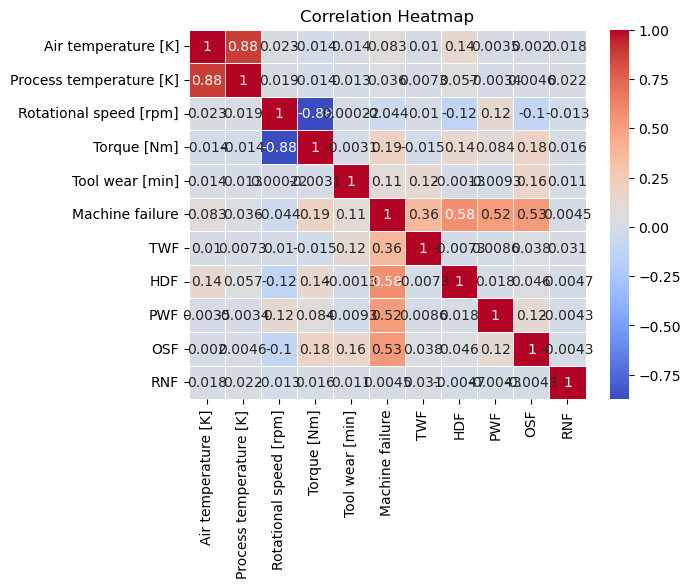

In [96]:
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



**Key Findings from the correlation matrices:**

1. **Strong Positive Correlation Between Air and Process Temperature**:
   - One of the most noteworthy findings is the strong positive correlation between air temperature and process temperature. When air temperature increases, we consistently observe a corresponding rise in process temperature.

2. **Inverse Relationship Between Rotational Speed and Torque**:
   - A striking trend is the inverse relationship between rotational speed and torque. As rotational speed increases, torque diminishes significantly. This indicates the presence of a critical operational dynamic.

3. **Tool Wear and Its Relationship with Machine Failure**:
   - Tool wear, while moderately correlated with air and process temperature, demonstrates a more robust connection with machine failure. Elevated tool wear is associated with a higher likelihood of machine failure events.

4. **Machine Failure Linked to Specific Variables**:
   - Machine failure is intricately linked with several factors within our operations. Notably, HDF (a specific type of tool wear) and PWF exhibit strong correlations with machine failure, potentially serving as early indicators of operational disruptions.

5. **TWF, HDF, PWF, OSF, RNF Correlations**:
   - Variables such as TWF, HDF, PWF, OSF, and RNF exhibit varying degrees of correlation with the broader operational factors, with the most pronounced associations occurring with machine failure.

These key findings offer a solid foundation for strategic decision-making. While correlation does not imply causation, it provides essential insights into the interplay of variables within our operational context. These insights enable us to optimize our operations, reduce risks, and enhance overall operational efficiency.


In [97]:
df1["Type"].value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [98]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

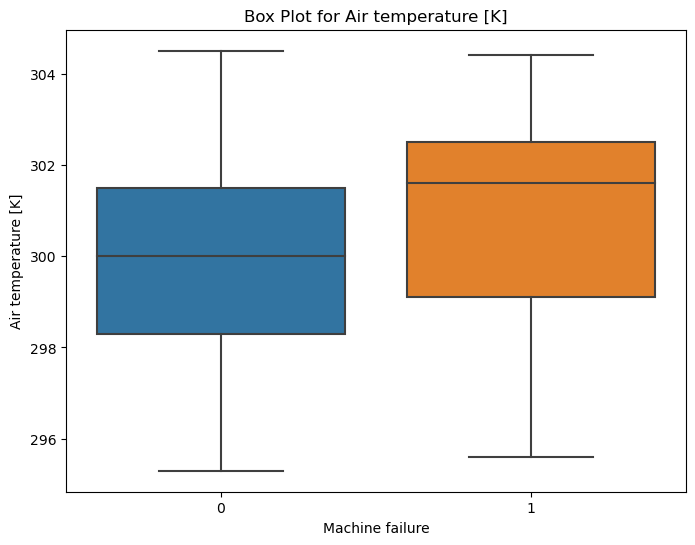

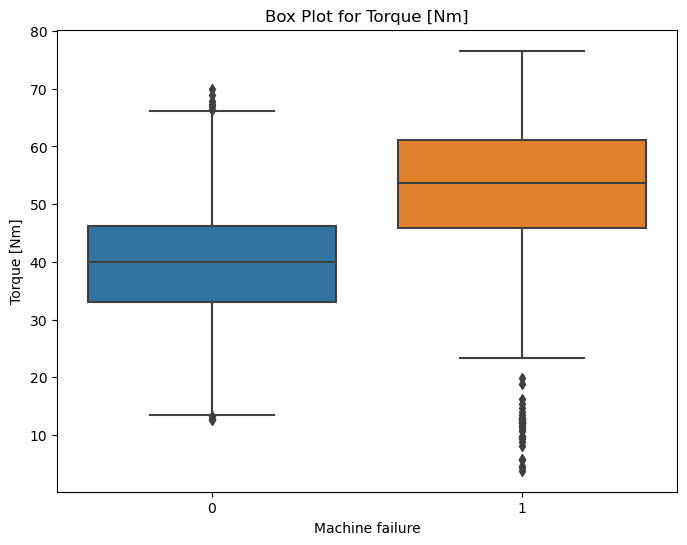

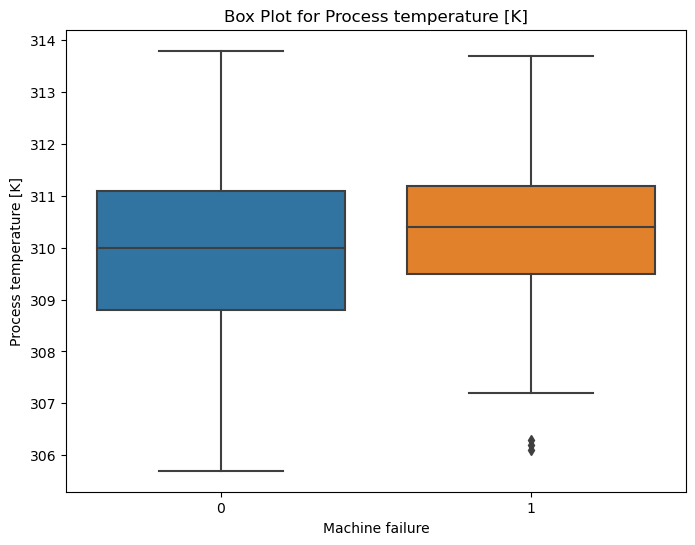

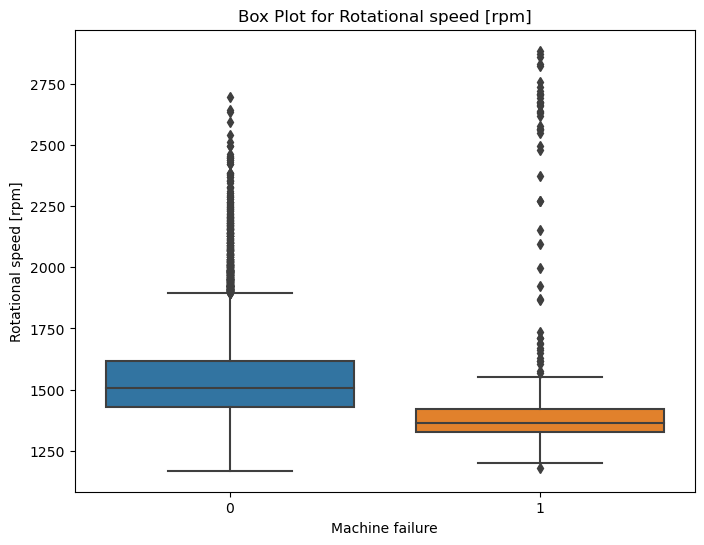

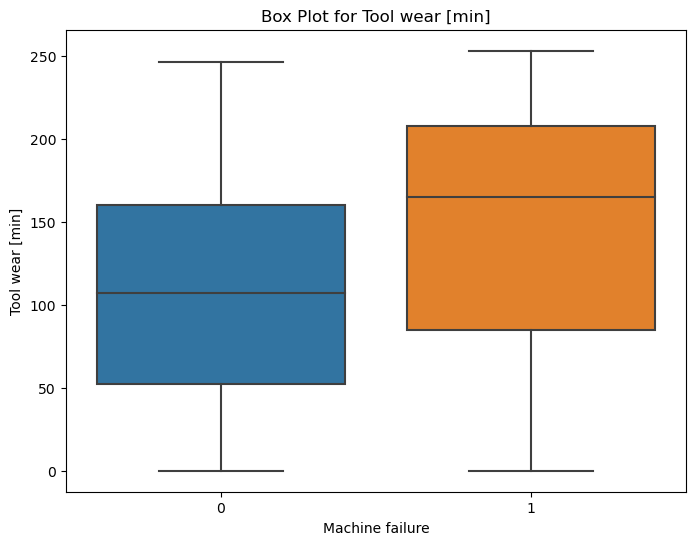

In [99]:
selected_columns = ['Air temperature [K]', 'Torque [Nm]','Process temperature [K]','Rotational speed [rpm]','Tool wear [min]']
for column in selected_columns:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x='Machine failure', y=column, data=df1)
    plt.title(f'Box Plot for {column}')
    plt.show()

Box plots serve as valuable tools for outlier detection, playing a pivotal role in upholding data integrity and bolstering the precision and dependability of statistical and machine learning models.

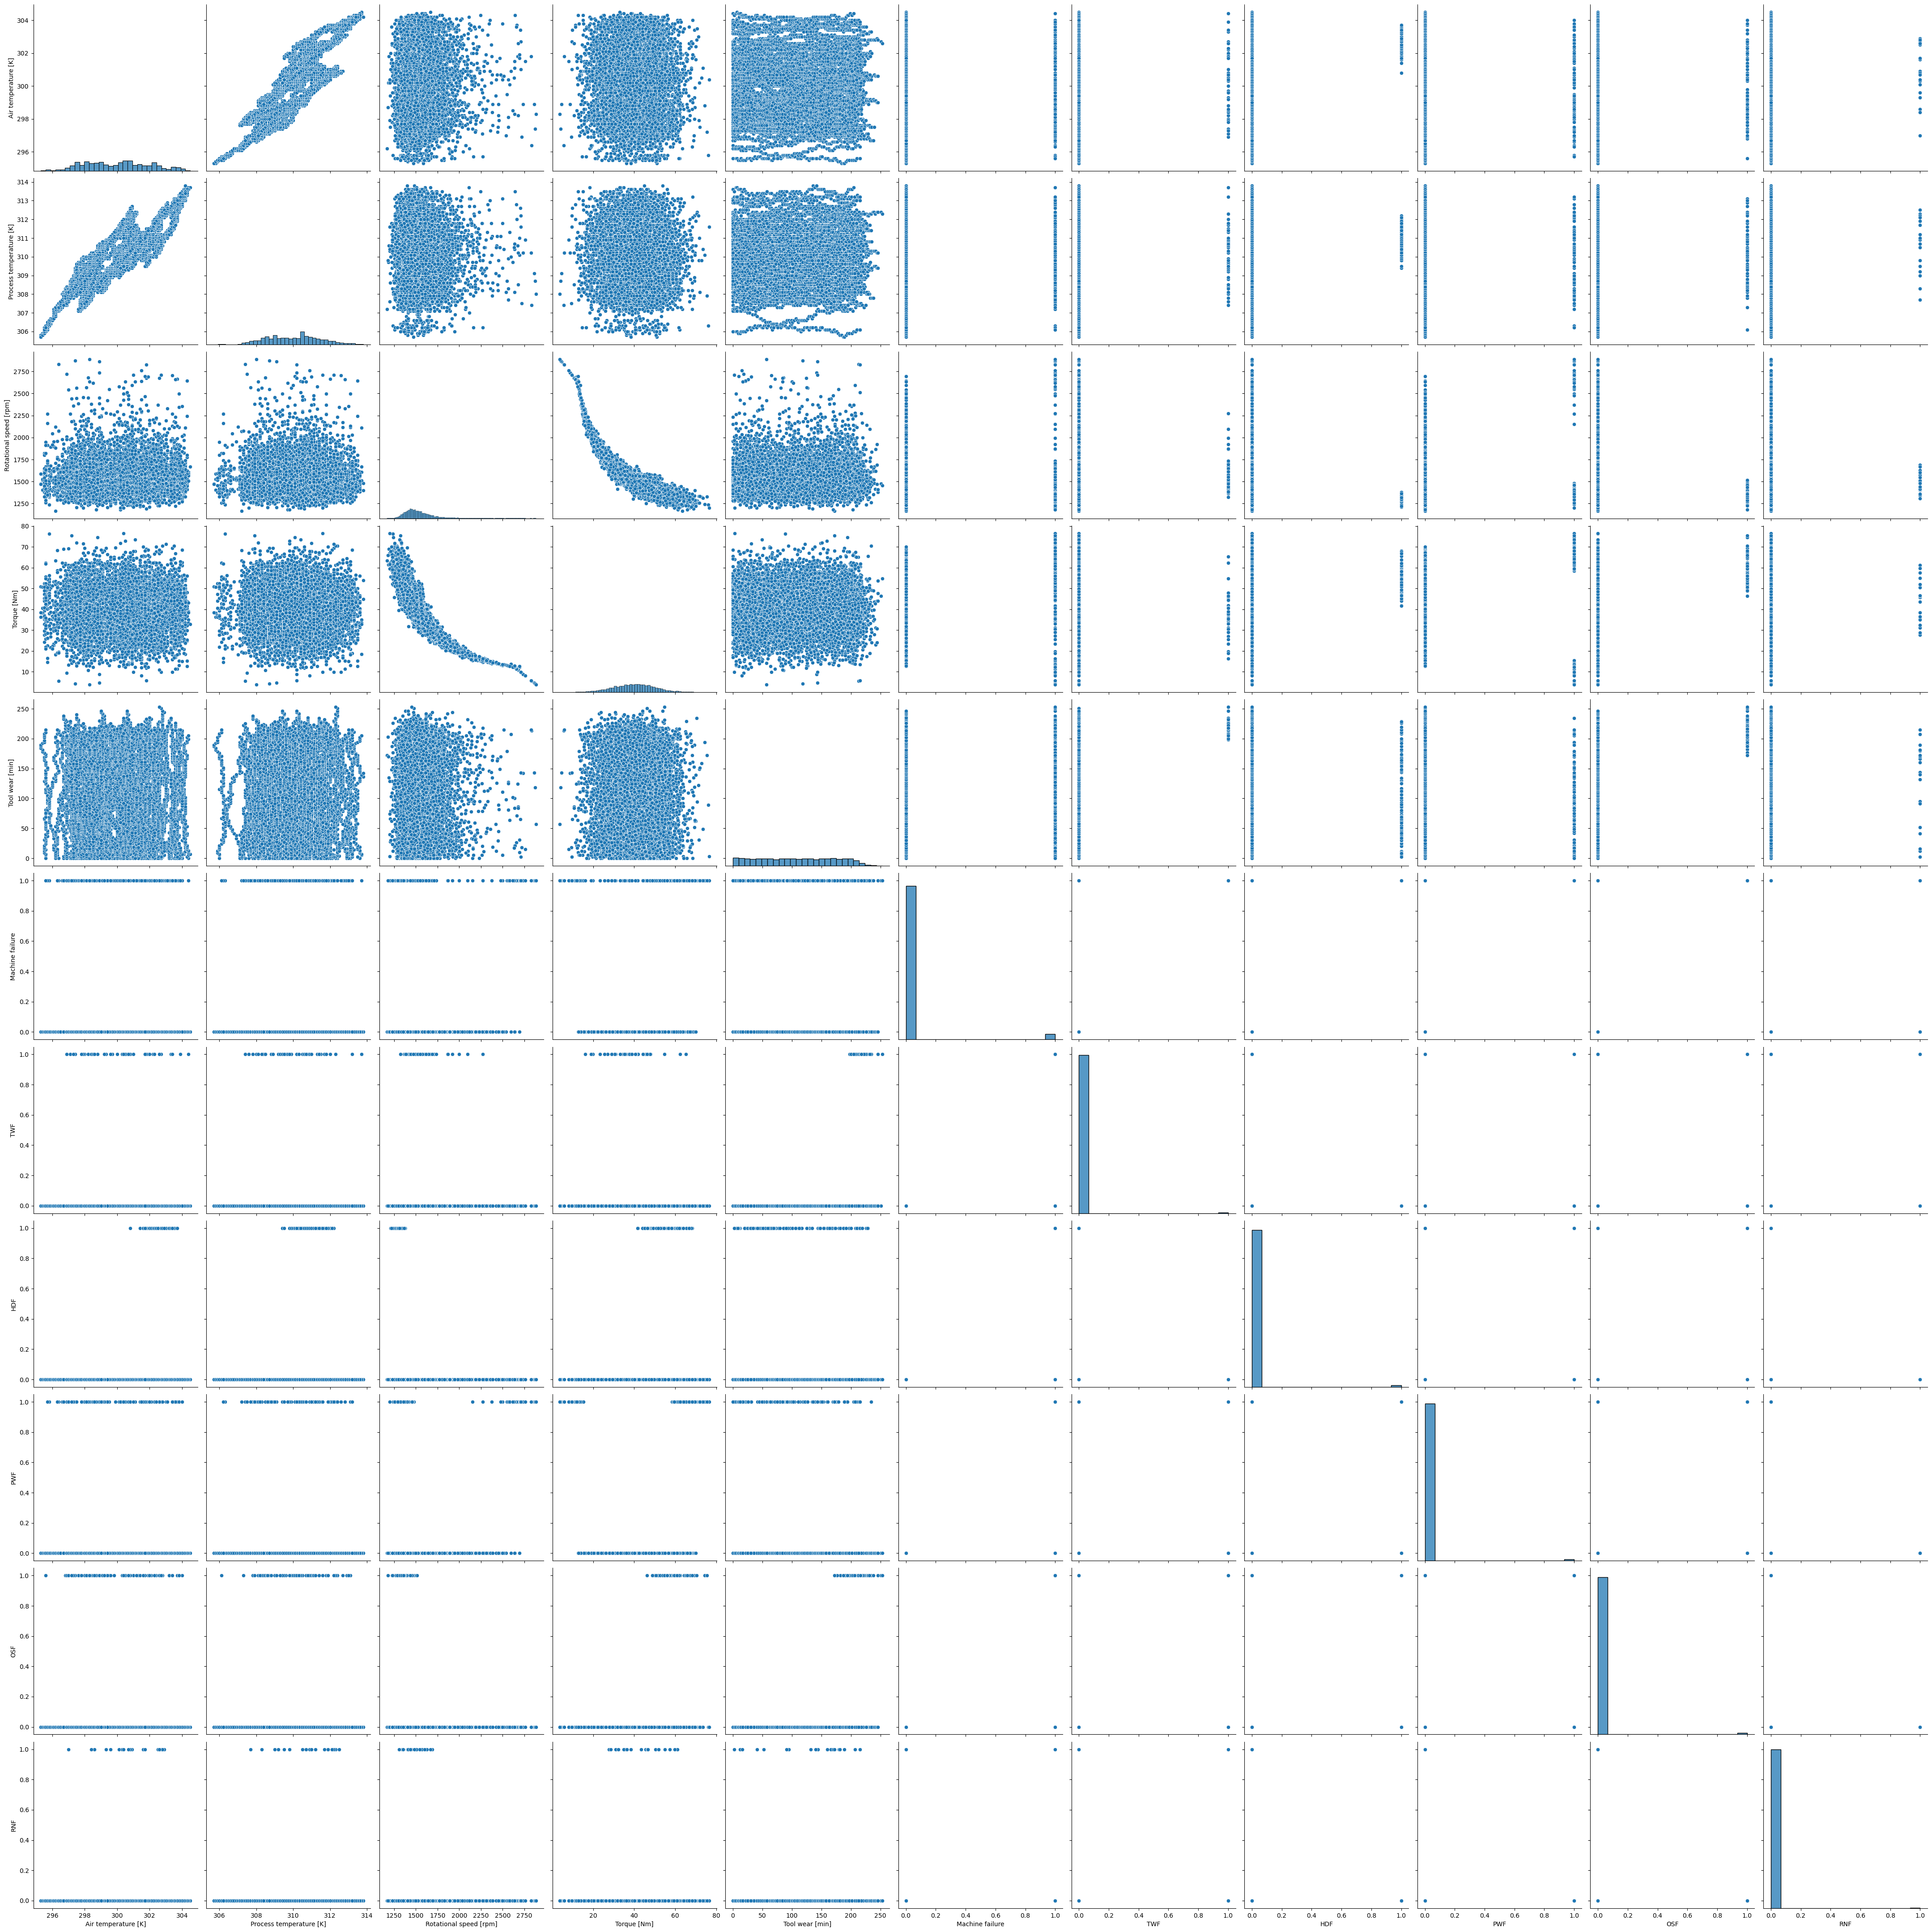

In [16]:
sns.pairplot(df1,height=4)

**Key Insights From The Exploratory Data Analysis:**

1. **Temperature Relationships**:
   - Air temperature and process temperature exhibit a strong positive correlation (0.8761). When air temperature rises, process temperature tends to increase as well. This suggests that controlling air temperature can help in managing process temperature.
   
2. **Rotational Speed and Torque**:
   - There is a significant negative correlation (-0.8750) between rotational speed and torque. As rotational speed increases, torque decreases markedly. This implies that we can optimize operations by carefully managing the balance between these two factors.
   
3. **Tool Wear and Machine Failure**:
   - Tool wear, while weakly correlated with air and process temperature, shows a notable positive correlation (0.1054) with machine failure. Increasing tool wear appears to be associated with a higher risk of machine failure.
   
4. **Machine Failure Predictors**:
   - Machine failure has substantial positive correlations with HDF (0.5758) and PWF (0.5228). These two variables could serve as strong indicators of impending machine issues.

**Recommendations:**

1. **Temperature Control**:
   - Given the strong correlation between air and process temperature, consider implementing robust temperature control mechanisms to ensure stable operations.

2. **Optimize Rotational Speed and Torque**:
   - Explore ways to balance rotational speed and torque effectively to maximize operational efficiency while minimizing machine stress.

3. **Monitoring Tool Wear**:
   - Implement a proactive tool wear monitoring system to detect and address tool wear issues before they lead to machine failures.

4. **Machine Failure Early Warning System**:
   - Develop an early warning system that closely monitors HDF and PWF, as they have strong correlations with machine failure. This can help in preventing unexpected downtime and maintenance costs.


6. **Collaboration**:
   - Foster collaboration between maintenance and operations teams to promptly address machine failure indicators and reduce unplanned downtime.

7. **Regular Maintenance**:
   - Implement a regular maintenance schedule based on insights gained from the analysis to keep machines in optimal working condition.

Incorporating these recommendations into our operations can lead to improved efficiency, reduced downtime, and enhanced overall operational reliability. Continuously monitoring these factors and making data-driven decisions will be key to our success in optimizing our machine operations.

In [8]:

#a function to remove outliers from all the columns in the dataframe using z-score

def remove_outliers_zscore(df, columns_to_check, zscore_threshold=3):
 
    # Make a copy of the input DataFrame to avoid modifying the original
    df_cleaned = df1.copy()

    # Iterate through each column to check for outliers
    for col in columns_to_check:
        if col in df_cleaned.columns:  # Check if the column exists in the DataFrame
            # Calculate the Z-score for each data point in the specified column
            zscores = np.abs(stats.zscore(df_cleaned[col]))

            outliers = (zscores > zscore_threshold) | (zscores < -zscore_threshold)

           
            df_cleaned[col][outliers] = np.nan

    df_cleaned.dropna(inplace=True)

    return df_cleaned


columns_to_check = ['Air temperature [K]', 'Torque [Nm]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Tool wear [min]']


df_cleaned = remove_outliers_zscore(df, columns_to_check)


C:\Users\OWNER\AppData\Local\Temp\ipykernel_6804\574810096.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col][outliers] = np.nan


In [9]:

df_cleaned.shape

(9822, 12)

In [10]:
df_dummies=pd.get_dummies(df_cleaned, columns=['Type'], prefix=['Type'], drop_first=True)
df_dummies.sample(5)


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
6154,301.0,310.9,1765.0,24.2,179,0,0,0,0,0,0,0,1
1857,297.7,307.4,1643.0,36.5,55,0,0,0,0,0,0,1,0
9045,297.4,308.4,1603.0,34.6,65,0,0,0,0,0,0,1,0
995,296.3,307.3,1566.0,35.8,175,0,0,0,0,0,0,1,0
2741,299.6,309.0,1378.0,51.9,162,0,0,0,0,0,0,1,0


There is an imbalance in the dataset where one class significantly outnumbers the other, which can have profound implications for model performance and predictive accuracy. To mitigate this issue, techniques like SMOTE (Synthetic Minority Over-sampling Technique) are employed to rebalance the class distribution by generating synthetic samples for the minority class. This ensures that the model learns from both classes effectively and improves its ability to generalize patterns, ultimately leading to more accurate predictions and fairer outcomes.

In [11]:
from imblearn.over_sampling import SMOTE

X = df_dummies.drop('Machine failure', axis=1)
y = df_dummies['Machine failure']  


smote = SMOTE(sampling_strategy='auto', random_state=42)


X_resampled, y_resampled = smote.fit_resample(X, y)


y_resampled.value_counts()


0    9529
1    9529
Name: Machine failure, dtype: int64

In [104]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,stratify=y_resampled)

In [105]:
y_train.value_counts()

0    7623
1    7623
Name: Machine failure, dtype: int64

**MODEL BUILDING**

Random Forest outshone other algorithms for our project primarily because of its ensemble approach. By combining multiple decision trees, it effectively reduces the risk of overfitting, ensuring that our model maintains a high level of accuracy and generalizability. 

Additionally, Random Forest's capacity to manage intricate, nonlinear relationships within the data was a crucial advantage. Many real-world datasets exhibit complex patterns that demand a flexible modeling technique, and Random Forest proved to be up to the task.

Furthermore, its robustness to outliers was a key consideration. In practical scenarios, data often contains anomalies that can skew results. Random Forest's ability to handle these outliers without compromising performance made it a dependable choice.

Lastly, the algorithm consistently delivered reliable results across multiple runs, instilling confidence in its suitability for our project. This reliability is essential in ensuring that our predictive model consistently produces accurate outcomes.

Overall, Random Forest's ensemble strategy, capacity to handle complexity, robustness to outliers, and reliability in results made it the ideal choice to lead our project to success.

**Using Gridsearch to select the best parameter**

In [106]:
clf = GridSearchCV(RandomForestClassifier(), {
    "n_estimators": [1, 5, 10,50]
}, cv=5, return_train_score=False)
clf.fit(X_resampled,y_resampled)
clf.cv_results_

{'mean_fit_time': array([ 0.53649182,  2.69917397,  5.35841985, 22.0434319 ]),
 'std_fit_time': array([0.09668676, 2.60801286, 0.75731703, 3.90490133]),
 'mean_score_time': array([0.24822545, 0.11828389, 0.42722239, 1.05495901]),
 'std_score_time': array([0.26167198, 0.06112698, 0.07082315, 0.39613935]),
 'param_n_estimators': masked_array(data=[1, 5, 10, 50],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 50}],
 'split0_test_score': array([0.95855194, 0.97534103, 0.97875131, 0.97980063]),
 'split1_test_score': array([0.94018888, 0.95724029, 0.96956978, 0.96852046]),
 'split2_test_score': array([0.76285414, 0.79669465, 0.91710388, 0.90556139]),
 'split3_test_score': array([0.94174757, 0.95985306, 0.97192338, 0.97008659]),
 'split4_test_score': array([0.96667541, 0.98241931, 0.98661769, 0.98871687]),
 'mean_test_score': array([0.9140035

In [107]:
df_params = pd.DataFrame(clf.cv_results_)
df_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.536492,0.096687,0.248225,0.261672,1,{'n_estimators': 1},0.958552,0.940189,0.762854,0.941748,0.966675,0.914004,0.076237,4
1,2.699174,2.608013,0.118284,0.061127,5,{'n_estimators': 5},0.975341,0.957240,0.796695,0.959853,0.982419,0.934310,0.069447,3
2,5.358420,0.757317,0.427222,0.070823,10,{'n_estimators': 10},0.978751,0.969570,0.917104,0.971923,0.986618,0.964793,0.024573,1
3,22.043432,3.904901,1.054959,0.396139,50,{'n_estimators': 50},0.979801,0.968520,0.905561,0.970087,0.988717,0.962537,0.029402,2


In [108]:
df_params[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,1,0.914004
1,5,0.934310
2,10,0.964793
3,50,0.962537


In [109]:
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.9850472193074502

In [110]:
ypr=rfc.predict(x_test)
print(classification_report(y_test,ypr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1906
           1       0.98      0.99      0.99      1906

    accuracy                           0.99      3812
   macro avg       0.99      0.99      0.99      3812
weighted avg       0.99      0.99      0.99      3812



In the provided classification report, both classes (0 and 1) have high precision, recall, and F1-Score values, all close to 0.98. This indicates that the model has performed exceptionally well in classifying instances from both classes. The accuracy of 0.98 demonstrates that the model has achieved a high level of overall correctness in its predictions. These strong performance metrics suggest that the model is effective in distinguishing between the two classes and is likely well-suited for the classification task at hand.

In [111]:
def predict_machine_failure(air_temp, process_temp, rotational_speed, torque, tool_wear, twf, hdf, pwf, osf, rnf, type_L, type_M):
    # Create an input array with the provided values
    input_data = np.array([air_temp, process_temp, rotational_speed, torque, tool_wear, twf, hdf, pwf, osf, rnf, type_L, type_M]).reshape(1, -1)

    # Use the trained logistic regression model (lr) for prediction
    prediction = rfc.predict(input_data)

    if prediction == 0:
        return "No Machine Failure"  # Replace with the appropriate label for no failure
    else:
        return "Machine Failure"  # Replace with the appropriate label for failure

# Example usage:
predicted_result = predict_machine_failure(25.5, 300.0, 1500.0, 40.0, 150.0, 0, 1, 0, 0, 1, 0, 1)
print("Predicted Result:", predicted_result)


Predicted Result: No Machine Failure


C:\Users\OWNER\anaconda3\New folder\anaconda__\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [113]:
import joblib
joblib.dump(rfc, 'Predictive Maintenance of Machinery.pkl')


['Predictive Maintenance of Machinery.pkl']